# 생각할것
- 상태는 어떻게 표현
- 행동?
- 환경은 어떻게 바뀔까
- 보상?
- 목표?
- 보상을 많이받음=목표?
## 추가
- 왜?
- 다른 방법?

# 문서 방향 인식
## 상태
이미지 입력 => 상태
## 행동
돌린다 or 안돌린다
## 환경의 변화
환경 없음
## 보상
사용자가 이미지를 직접 돌려서 방향을 맞춘다 => -1
그렇지 않는다 => 0
- 귀찮아서 안돌릴 가능성이 있기때문
# 목표
사용자가 이미지를 직접 돌리지 않도록 한다
- 보상의 최대화 = 이미지를 돌리지않음 = 성공

# 문제?
막 이상하게돌리면 막막 

### 상태
이미지 라이브러리를 사용해서 상태에 이미지 정보를 담은 배열이 들어간다. 
### 행동
0: 돌리지 않기
1: 오른쪽으로 돌리기
### 보상
사용자가 사진을 돌린다면?
사용자가 돌린 방향(정확한 방향)과 지금 돌아간 방향을 비교해 그 차이에 따라 90도는 -1, 180도는 -2의 식으로 지급한다.
사용자가 돌리지 않는경우, `제대로 돌렸거나 / 귀찮아서 돌리지 않았거나`의 경우가 있다. 그러나 이를 구분할수 없기 때문에 같은것으로 취급, 0의 보상을 지급한다.
### 목표
보상의 최대화, 즉 돌려준 사진이 사용자가 원한만큼 돌아갈수 있도록한다.
### 보상을 많이 받을수록 목표를 빠르게 이룰까?
여기서 보상을 많이 받는 경우는 사용자가 원하는 이미지가 많이 나올수록 많이 받게된다.
따라서 보상이 많을수록 목표를 이루게된다.
### 목표와 관련


In [14]:
from PIL import Image
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

In [18]:
class DocuDirectionEnv:
    def __init__(self):
        # rooms = list(range(101, 107))
        # self.state_space = [(i, j) for i in rooms for j in rooms]
        self.action_space = [0, 1]

    # def transition(self, state, action): # 상태, 행동
    #     current_location, my_room = state
    #     next_location = current_location + action 
    #     next_location = max(next_location, 101) 
    #     next_location = min(next_location, 106)
    #     next_state = (next_location, my_room)
    #     return next_state

    def reward_function(self, state): #사용자가 돌렸는가?(원본이미지와 차이있나?)
        # next_state = transition(state, action)
        # next_location, my_room = next_state
        # if next_location == my_room:
        #     return 1
        # return 0
        if (np.rot90(state, 1)==self.original_state).all():
            return -1
        elif (np.rot90(state, 2)==self.original_state).all():
            return -2
        elif (np.rot90(state, 3)==self.original_state).all():
            return -1
        else:
            return 0



    def reset(self):
        # same_start_and_end = False
        # while not same_start_and_end:
        #     state = random.choice(self.state_space)
        #     same_start_and_end = state[0] != state[1]
        # self.state = state
        # return state
        state = np.array([[[random.choice([0,255])]*3 for ii in range(512)] for iii in range(512)]) # 512x512의 노이즈 이미지

        self.original_state = copy.copy(state)
        state = np.rot90(state, random.randint(0, 3))
        self.state=state
        return state
        

    def step(self, action): # action = 0 or 1
        # next_state = self.transition(self.state, action)
        # reward = self.reward_function(self.state, action)
        # if action==3: done = (next_state[0]==next_state[1])
        # self.state = next_state
        # return next_state, reward, done
        if action==0:
            done = True
            next_state=self.state
        else:
            next_state=np.rot90(self.state, 1)

        reward=self.reward_function(next_state)

        self.state=next_state

        return next_state, reward, done
    
# 0을고르면 그만하면 된다

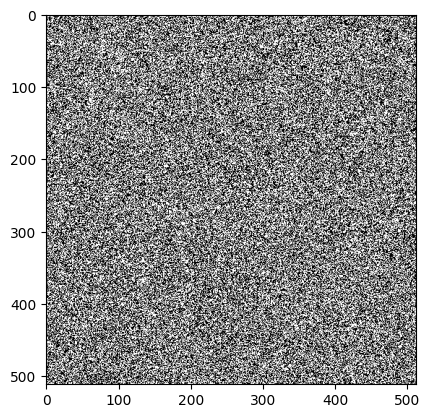

Chose action: 1


UnboundLocalError: cannot access local variable 'done' where it is not associated with a value

In [20]:
env = DocuDirectionEnv()
state = env.reset()
done = False
# print("Initial state:", state)
plt.imshow(state)
plt.show()
a=0
while not done:
    a+=1
    action = random.choice(env.action_space)
    print("Chose action:", action)
    state, reward, done = env.step(action)
    plt.imshow(state)
    plt.show()
    # print("New state:", state)
    print("Reward:", reward)
    print("="*10)
    
print(a)